In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd       
df_train = pd.read_csv("clean_train.csv")
#df_train.head()

In [2]:
#Bag of word representation
#max_features = 5000 for save memory
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [3]:
train_data_features = vectorizer.fit_transform(df_train["comment_text"])

In [7]:
#It takes lot of memory though it improve speed of learning 
#train_data_features = train_data_features.toarray()

In [7]:
#Split data into train and validation
#Try to predict toxic or not
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    train_data_features, df_train["toxic"], test_size=0.33, random_state=42)

In [8]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, y_train)

In [11]:
result = forest.predict(X_valid)

In [41]:
#make series to list
y_valid = list(y_valid)

In [43]:
#Calculate error rate
error = 0
for i in range(len(y_valid)):
    if(result[i] - y_valid[i] != 0):
        error += 1
print(error / len(y_valid))

0.04739930496211474


In [44]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     47576
          1       0.83      0.64      0.72      5083

avg / total       0.95      0.95      0.95     52659



In [55]:
#Probability to calculate ROC curve
prob = forest.predict_proba(X_valid)[:,1]

In [56]:
#fpr:False Positive, tpr: True Positive
#Positive = Toxic comment
fpr, tpr, thresholds = mtr.roc_curve(y_valid, prob)

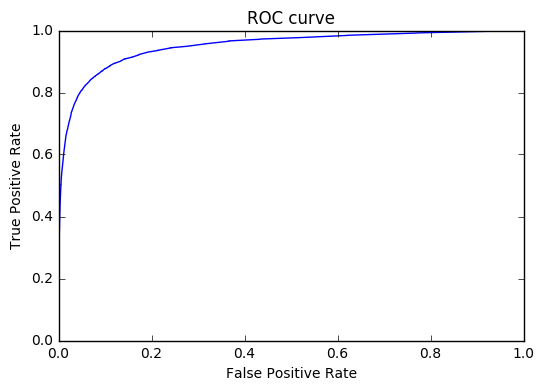

In [57]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [9]:
#vocab = vectorizer.get_feature_names()
#print(vocab)

In [8]:
#Confirm which kinds of and how many words in the "bag of words"
#Notice the word appeared few times is ingnored in the bag.
import numpy as np
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print(count, tag)

770 00
1864 000
150 000000
751 01
646 02
680 03
583 04
633 05
696 06
561 07
623 08
626 09
2906 10
2121 100
212 1000
249 101
152 102
214 103
189 104
184 105
150 106
200 107
223 108
198 109
2078 11
212 110
176 111
181 112
120 113
224 114
152 115
121 116
128 117
201 118
151 119
1960 12
226 120
187 121
215 122
209 123
165 124
145 125
181 127
239 128
284 129
1515 13
264 130
163 131
154 132
189 133
178 134
155 135
124 136
175 137
195 138
204 139
1731 14
174 140
260 141
261 142
126 143
273 144
163 145
217 146
183 147
120 148
192 149
1843 15
247 150
124 151
146 153
137 154
155 155
158 156
136 157
198 159
1640 16
153 160
164 161
203 162
133 163
147 164
125 165
193 166
232 168
146 169
1529 17
156 170
155 171
195 172
245 173
235 174
189 176
228 177
166 178
146 179
1533 18
184 180
152 181
166 182
141 183
175 184
155 185
192 186
150 187
157 188
143 189
1504 19
218 190
147 191
275 192
182 193
175 194
181 1945
240 195
138 196
287 1967
135 1970
139 1975
137 1979
161 198
162 1980
122 1980s
137 1982
162